# Predictors in linear models

*Gries, Chapter 5, pp. 247-261 (general principles of model selection), but especially 261-276*

A classic application of statistics in linguistic research involves lexical reaction times. From Gries's textbook we can borrow an illustrative dataset in this domain (see p. 261, note 30):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update(
    {"mathtext.default": "regular", "figure.dpi": 300, "figure.figsize": (6, 6)}
)
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

In [2]:
df = pd.read_csv("../../datasets/gries/05-2_reactiontimes.csv", sep="\t")
df

,CASE,RT,FREQUENCY,FAMILIARITY,IMAGEABILITY,MEANINGFULNESS
0,almond,650.9947,0.693147,NaN,NaN,NaN
1,ant,589.4347,1.945910,med,hi,415.0
2,apple,523.0493,2.302585,hi,hi,451.0
3,apricot,642.3342,0.693147,lo,lo,NaN
4,asparagus,696.2092,0.693147,med,lo,442.0
...,...,...,...,...,...,...
72,tortoise,733.0323,1.386294,lo,lo,403.0
73,walnut,663.5908,2.484907,med,lo,468.0
74,wasp,725.7056,1.098612,NaN,NaN,NaN
75,whale,609.9745,0.000000,med,hi,474.0


For 77 words (or "lexical items", see **CASE**), this data holds, first of all, the main dependent variable, namely the **reaction time** (RT) to words in a lexical decision task (in miliseconds). (In reality, this is an *average* response time that has been calculated over the responses of multiple participants.) Throughout this notebook, we will turn to linear models and figure how well we can predict RT from the following **independent variables**:
  - **FREQUENCY**: the logged frequency of these words in a large reference corpus
  - **FAMILIARITY**: an index summarizing subjects’ rated familiarity with the referent of the word;
  - **IMAGEABILITY**: a binary variable that summarizes the subjects’ rated imageability of the referent of the word
  - **MEANINGFULNESS**: the subjects’ average meaningfulness rating of the stimulus word.

To this, we're going to add a variable of our own, which is the **LENGTH** of the stimulus in characters:

> RECAP: pandas `Series` objects have a number of "vectorised" methods in the API. The string methods are accessed via `.str` so `.str.len()` invokes the `len()` method you are familiar with on every entry in `CASE` and returns all the results at once as a vector.

In [3]:
df["LENGTH"] = df.CASE.str.len()
df

,CASE,RT,FREQUENCY,FAMILIARITY,IMAGEABILITY,MEANINGFULNESS,LENGTH
0,almond,650.9947,0.693147,NaN,NaN,NaN,6
1,ant,589.4347,1.945910,med,hi,415.0,3
2,apple,523.0493,2.302585,hi,hi,451.0,5
3,apricot,642.3342,0.693147,lo,lo,NaN,7
4,asparagus,696.2092,0.693147,med,lo,442.0,9
...,...,...,...,...,...,...,...
72,tortoise,733.0323,1.386294,lo,lo,403.0,8
73,walnut,663.5908,2.484907,med,lo,468.0,6
74,wasp,725.7056,1.098612,NaN,NaN,NaN,4
75,whale,609.9745,0.000000,med,hi,474.0,5


## Numeric predictors

From the last notebook, we already know that we can use `ols()` to learn a linear mapping from one numeric variable (the independent variable) to another numeric variable (the dependent variable). Perhaps the simplest case is the logged frequency in the RT data: the more common or frequent a word is, the faster it will be recognized (i.e. there exists a negative correlation between the two):

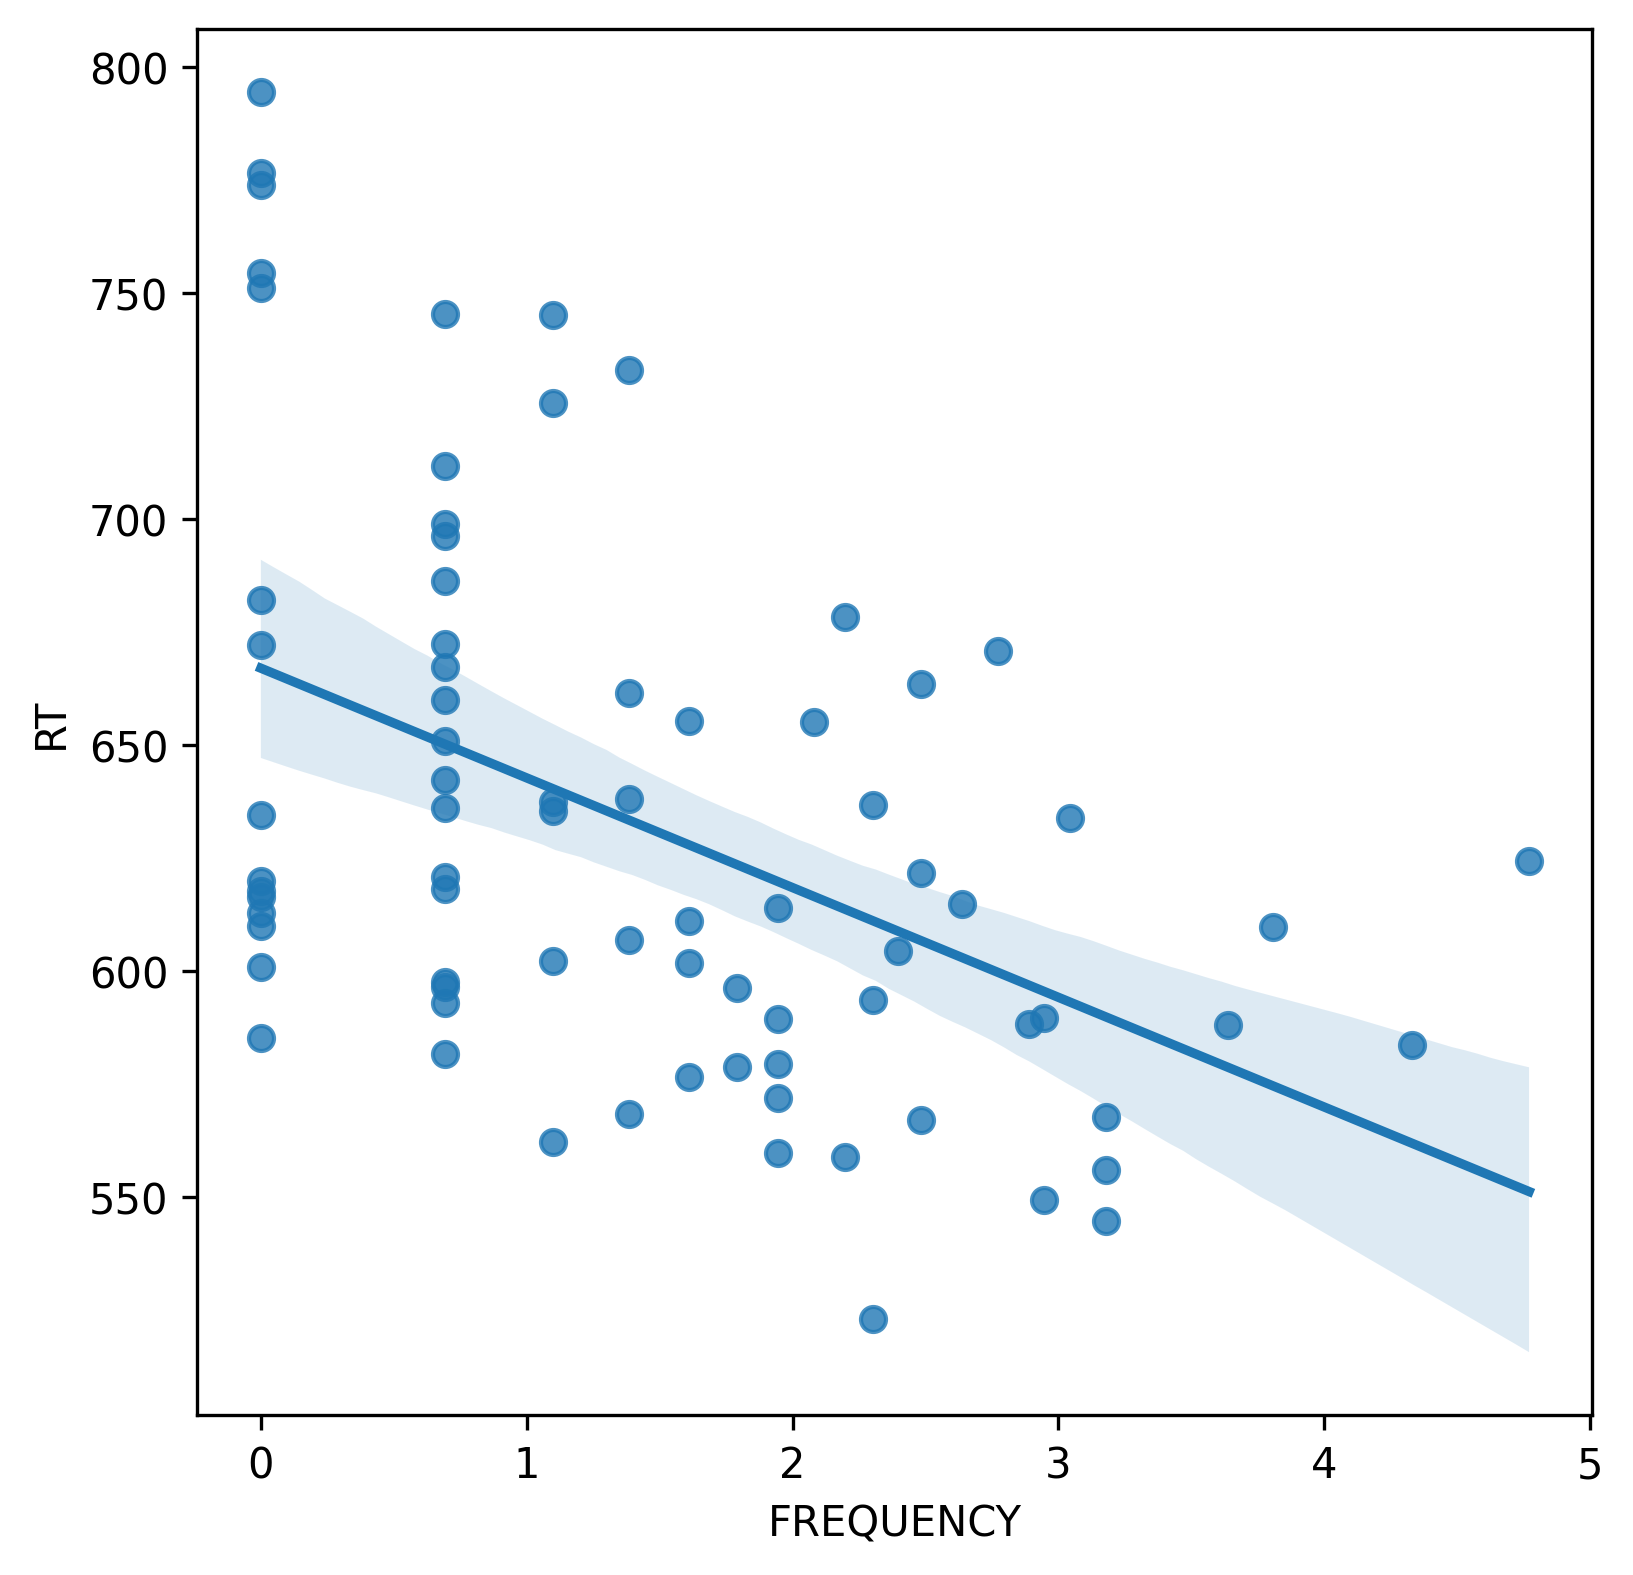

In [4]:
sns.regplot(df, x="FREQUENCY", y="RT")
plt.show()

In [5]:
model = smf.ols("RT ~ FREQUENCY", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     21.02
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.78e-05
Time:                        10:12:00   Log-Likelihood:                -414.72
No. Observations:                  77   AIC:                             833.4
Df Residuals:                      75   BIC:                             838.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    667.0326      9.801     68.060      0.0

We obtain a reasonably good model fit, with a sufficiently small p-value for our single predictor and a reasonable Adjusted $R^2$. As expected, we get a *negative* parameter estimate for FREQUENCY.

By the way, note that our residuals are (barely) above the critical threshold for normality, so it's useful to compare with last time

Here we can see that the distribution is slightly **skewed** (which is also reported in the bottom section of the model diagnostics) because there is a lower boundary for how quickly humans can react but not an upper one (at least not within the timeframe of the experiment). This will affect the normality of the residuals.

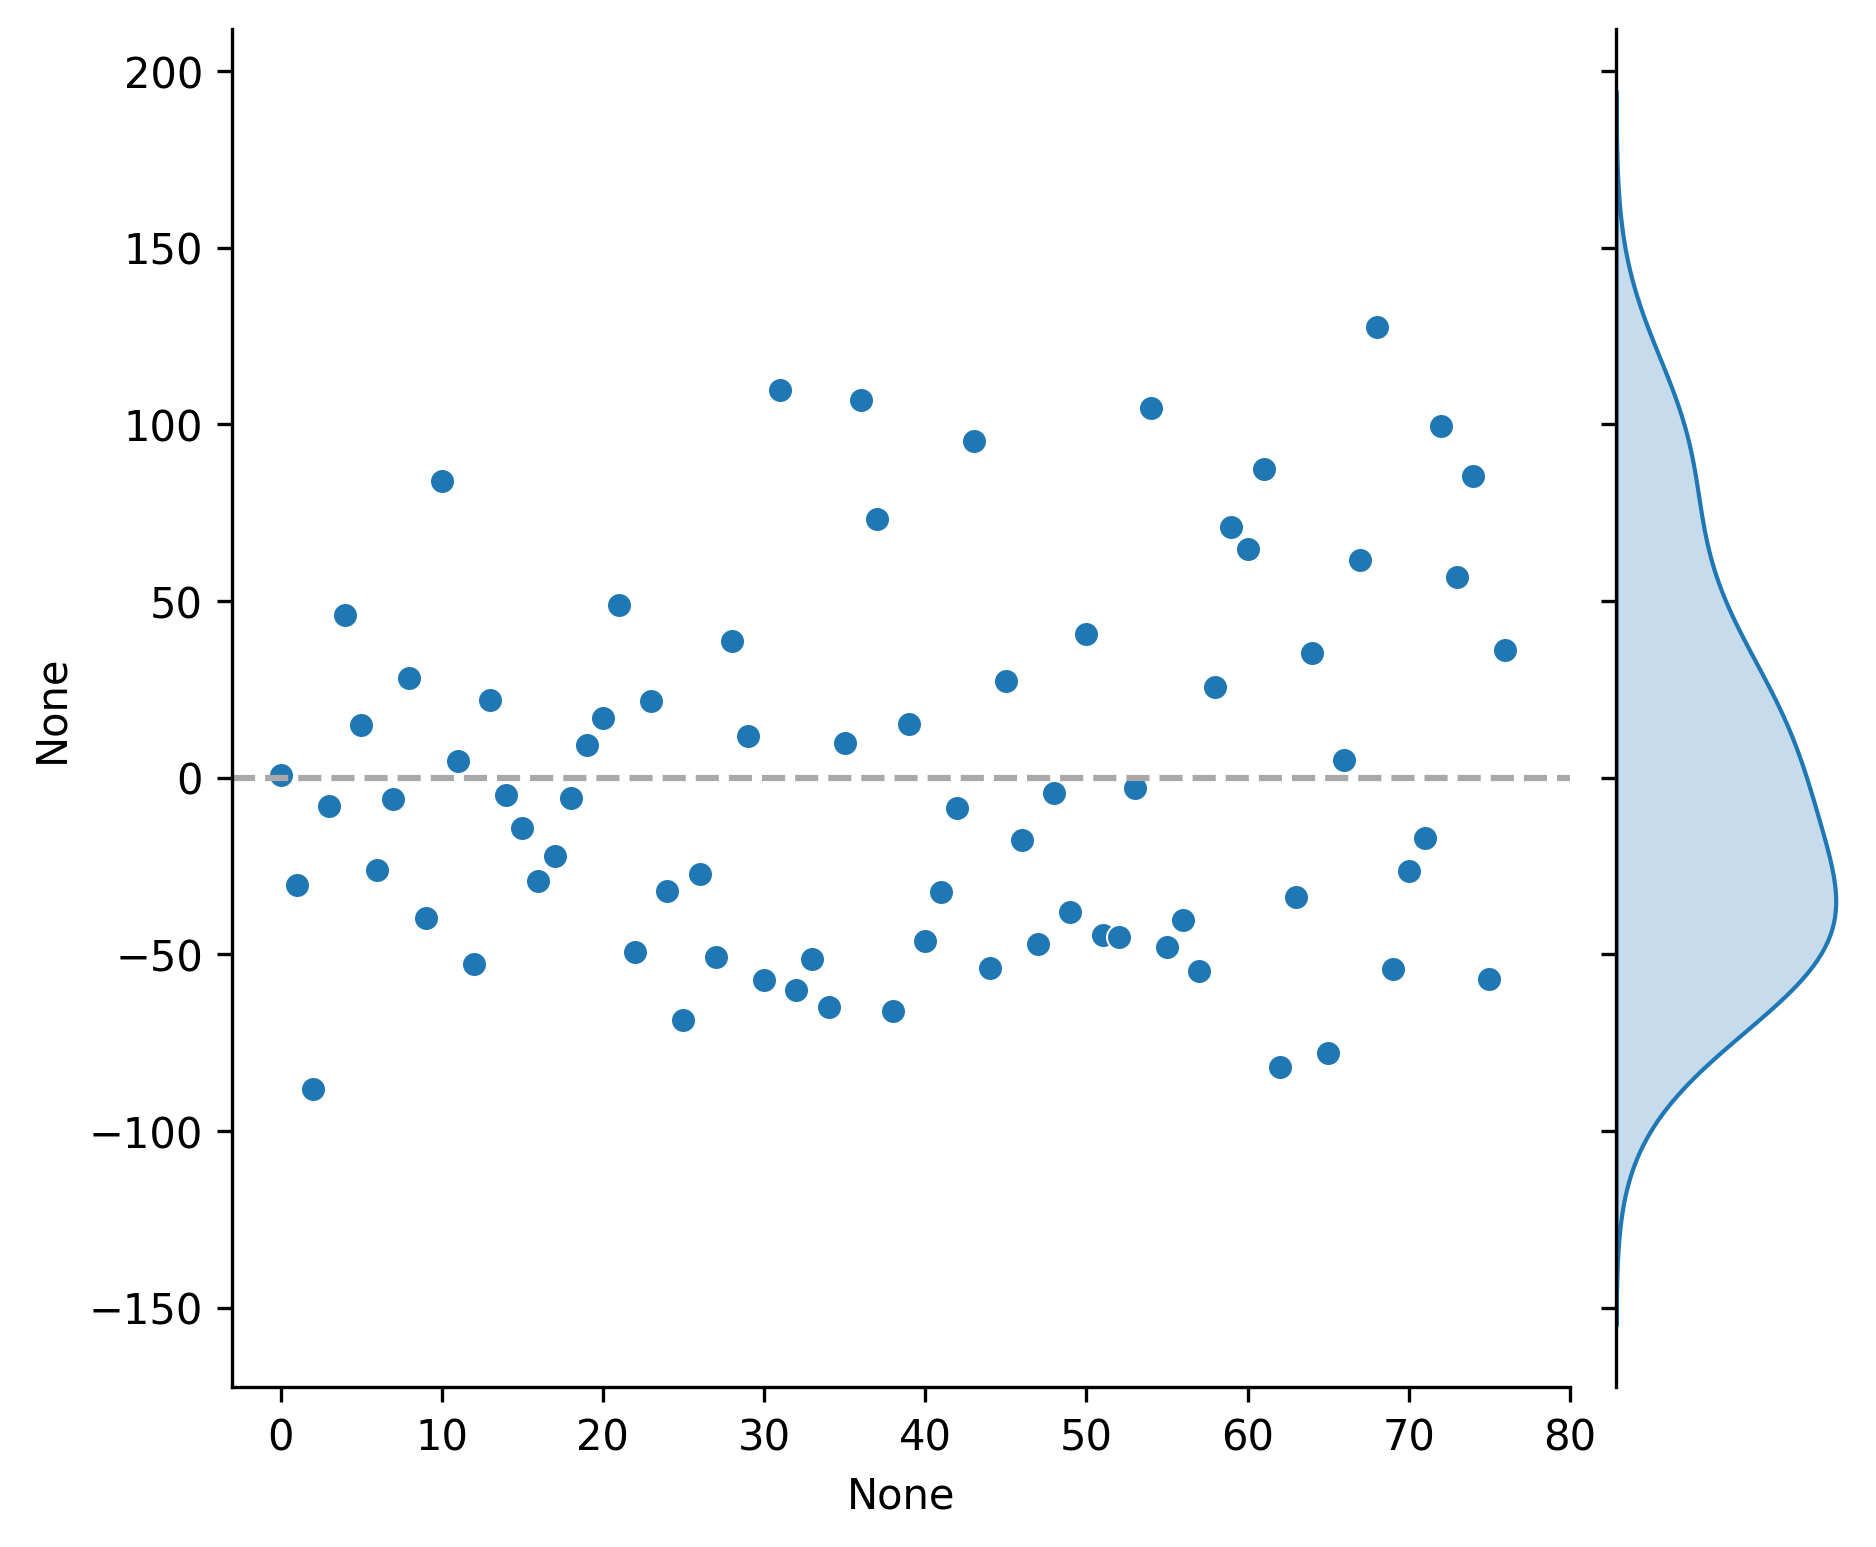

In [6]:
g = sns.JointGrid(model.resid)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot, fill=True)
g.ax_marg_x.remove()
g.ax_joint.axhline(0, color="darkgrey", linestyle="--")
g.ax_joint.set_xlim(-3, 80)
plt.show()



A similar linear relationschip can be assumed for LENGTH: the longer a word, the more reading time participants will need. Thus, this time, we can expect a positive correlation between the two:

In [7]:
model = smf.ols("RT ~ LENGTH", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     13.55
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           0.000435
Time:                        10:12:01   Log-Likelihood:                -417.83
No. Observations:                  77   AIC:                             839.7
Df Residuals:                      75   BIC:                             844.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    557.5332     21.166     26.341      0.0

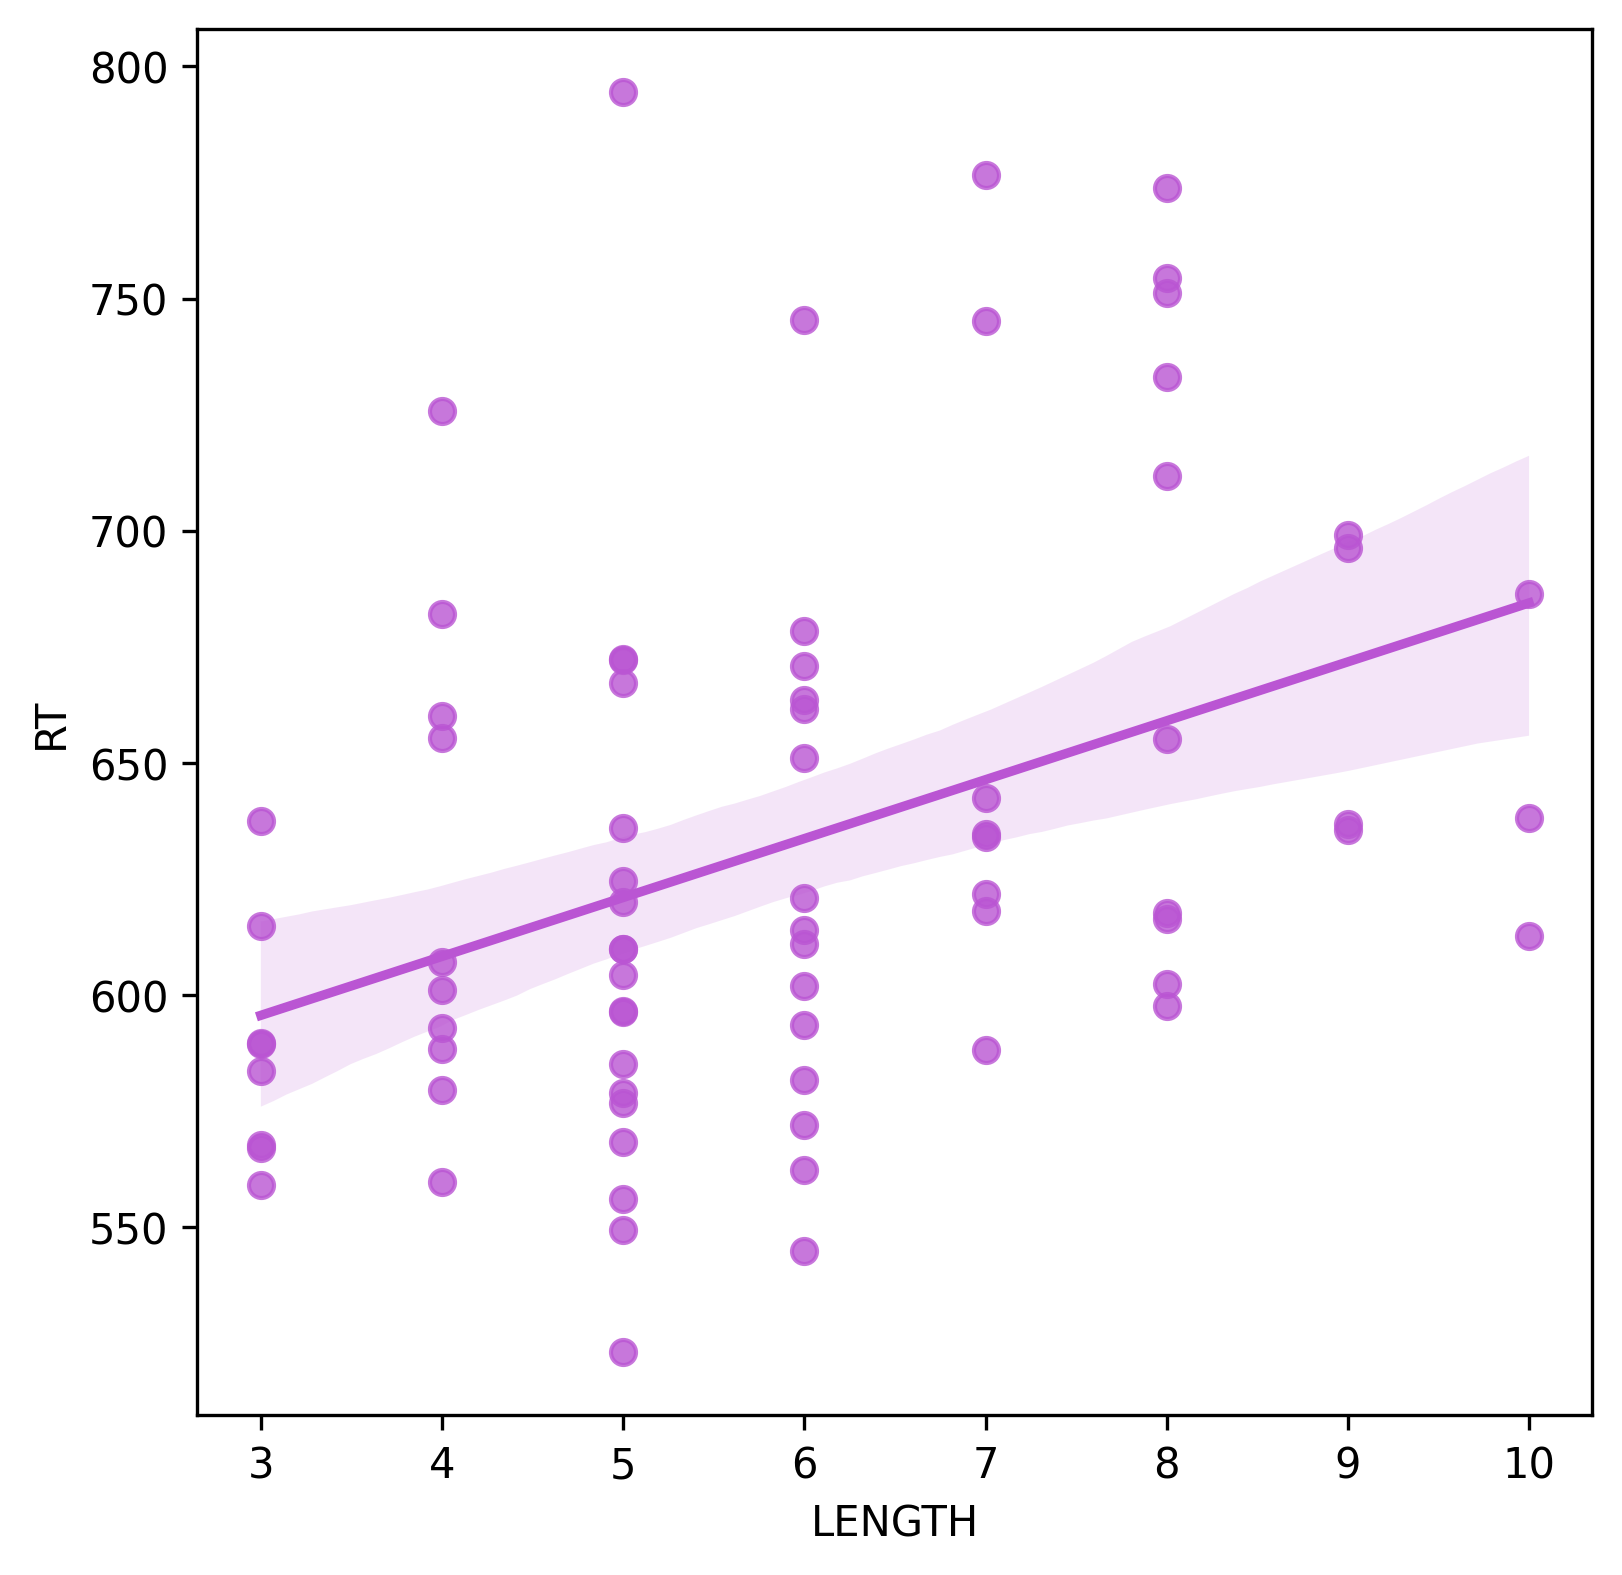

In [8]:
sns.regplot(df, x="LENGTH", y="RT", color="mediumorchid")
plt.show()

The story is similar: a positive estimate for our sole input independent variable, with a small $p$-value and a reasonable (yet slightly lower) $R^2$.

## Multiple (numeric) predictors

We know that both input parameteters help us to explain the variance in the dependent variable. They even do so in opposite manners (positive vs negative correlation) and thus might offer useful information that is complementary.  Until now, we have only considered **monofactorial** models where a single predictor had to do all the work. Obviously, that is a simplification of how things work in the real world: the proportion of direct speech in a novel will depend on much more factors than just the author's age or language. To account for that, we will now move to **multifactorial** applications of `ols()`, where two or more predictors are *jointly* used to model the dependent variable. "Jointly", however, can mean many things in this context and we will unpack that topic step-by-step below, starting from simpler models.

In a multifactorial model we combine the predictors, using a plus sign (`+`) in the formula, which tells `ols()` to combine the predictive strength of two predictors:

In [9]:
model = smf.ols("RT ~ FREQUENCY + LENGTH", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     14.56
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           4.66e-06
Time:                        10:12:01   Log-Likelihood:                -411.46
No. Observations:                  77   AIC:                             828.9
Df Residuals:                      74   BIC:                             835.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    609.8283     24.286     25.110      0.0

Importantly, the combination of both predictors appears to yield superior predictions in comparison to using either one of them in isolation: the p-value goes further down and the adjusted $R^2$ goes up. The residuals for the combined models look better than either model in isolation.

> Question: the predictive power of LENGTH diminishes when it is combined with FREQUENCY. What could be going on here?

## Categorical predictors

##### Binary predictor

We have other columns left in our dataset, IMAGEABILITY and FAMILIARITY. These variables are clearly not numeric in nature, but rather **categorical**. Regarding FAMILIARITY, especially because this is a **binary** variable (i.e. a factor with only two levels, 'hi' and 'lo'), you might instinctively not think of `ols()` and there are more straightforward options. We could start with a simple boxplot, as we have done so often before:

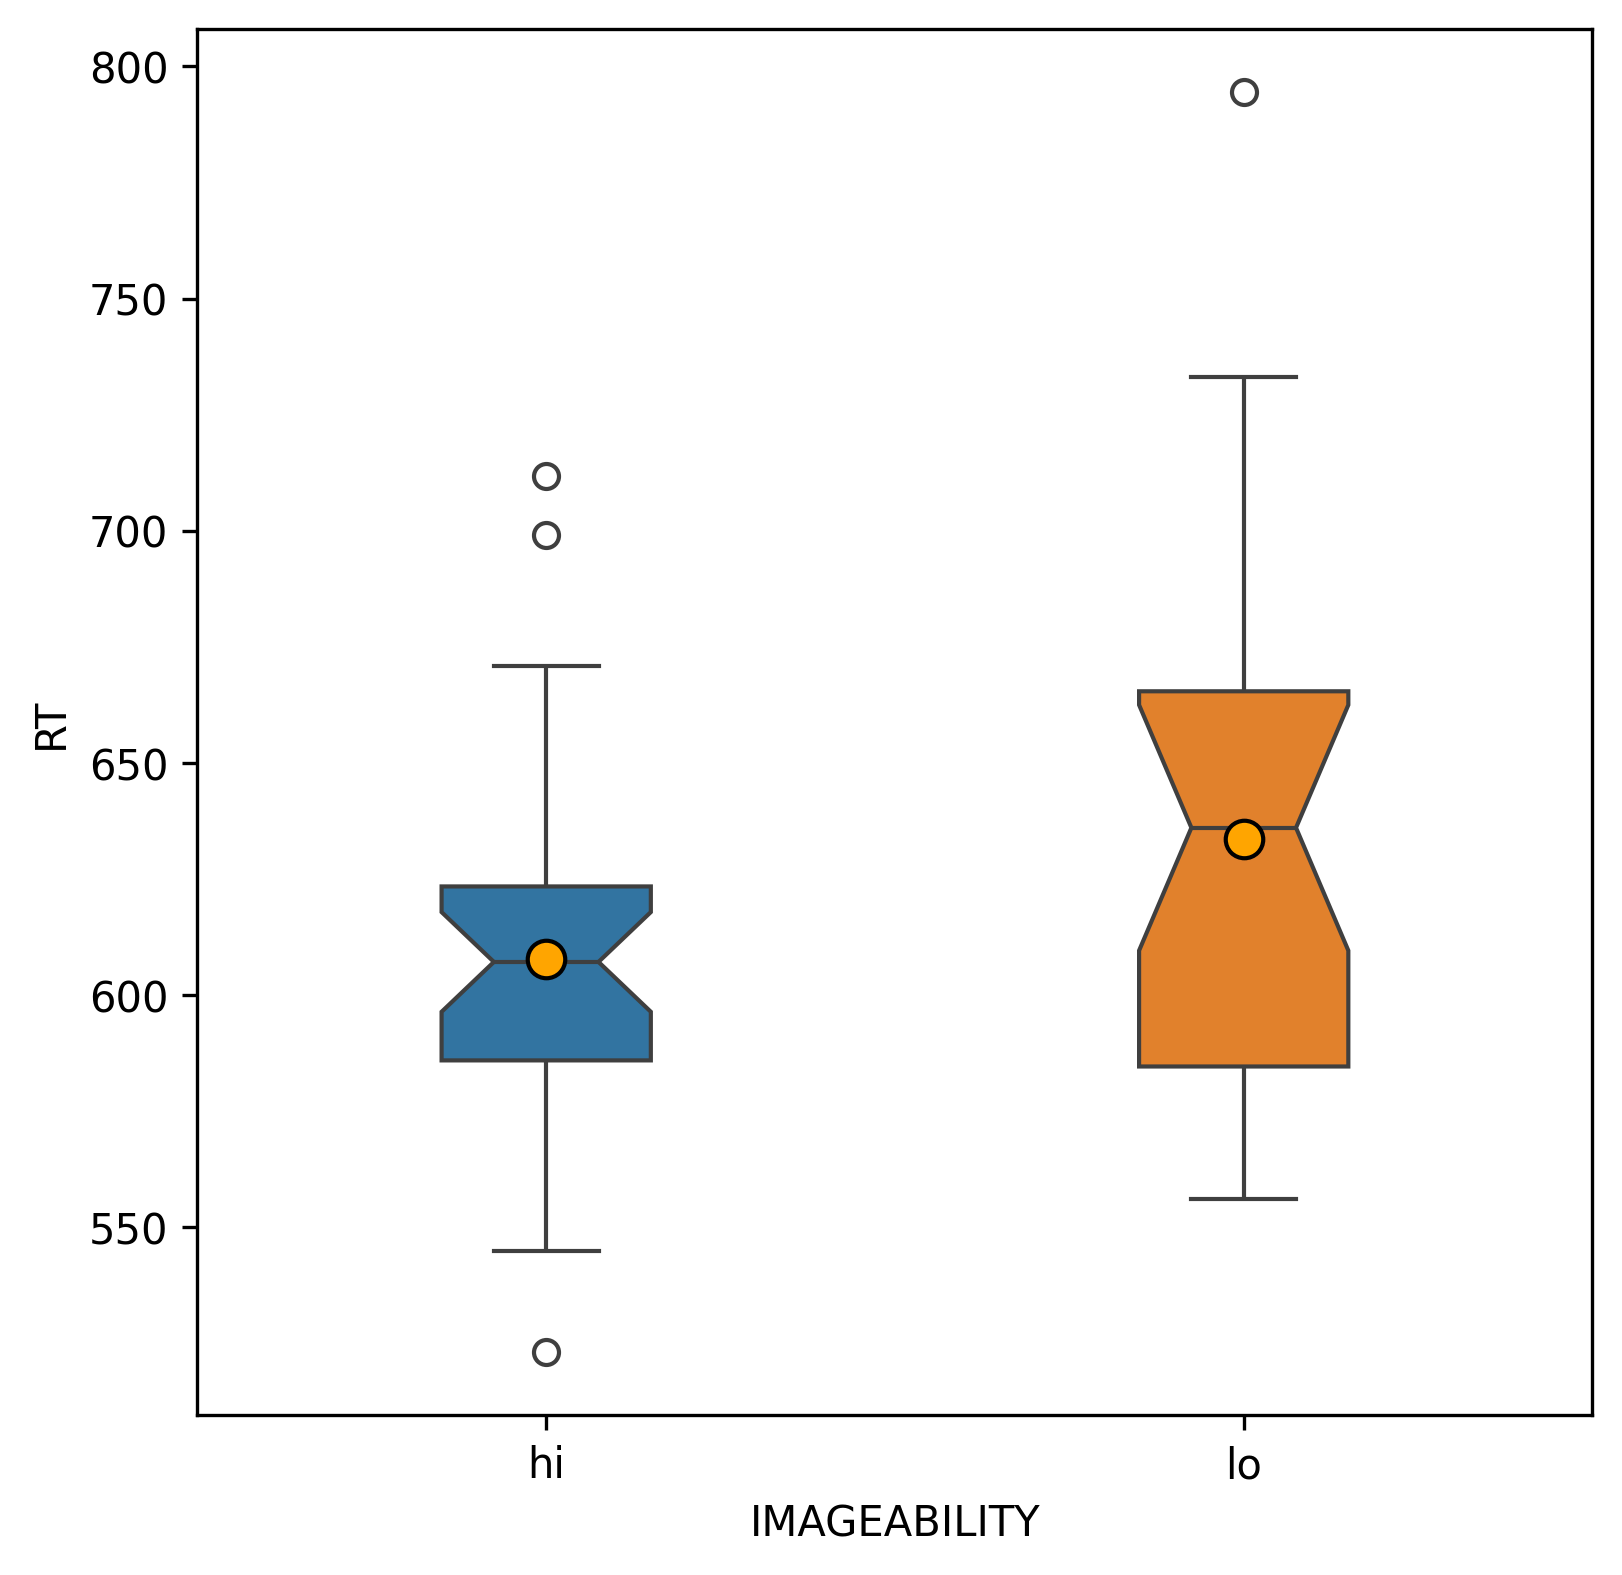

In [10]:
ax = sns.boxplot(
    df,
    y="RT",
    x="IMAGEABILITY",
    hue="IMAGEABILITY",
    notch=True,
    width=0.3,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "orange",
        "markeredgecolor": "black",
        "markersize": "9",
    },
)
ax.get_legend().remove()

plt.show()

There seems to be a difference in RT across both categories, which could be significant (although the **notches** do overlap in the boxplot). Running a (one-tailed) Mann-Whitney $U$ test on this data returns a mildly significant difference, which would support our hypothesis that IMAGEABILITY is at least somewhat helpful in modelling RTs:

In [11]:
sp.stats.mannwhitneyu(
    df.RT[df.IMAGEABILITY == "lo"],
    df.RT[df.IMAGEABILITY == "hi"],
    alternative="greater",
)

MannwhitneyuResult(statistic=440.0, pvalue=0.04495212652666389)

As a next step, we will now repeat a similar test but with `ols()`, which is, somewhat surprisingly, perfectly possible. If you would *only* have IMAGEABILITY as predictor variable, it wouldn't make sense to apply `ols()` since there are much more obvious tests  for such cases (such as the Wilcoxon from above). In this context, however, we are working towards **multivariate** analyses, where we will combine *multiple* predictors, that may *not all be of the same type*. It's in that context, that the application of `ols()` will make much more sense (since variable combinations, let alone variable interactions aren't feasible with simpler, bivariate texts).

First, though, because these are **ordered categories** we are going to change their `type` in the dataframe. This type information will automatically be passed through to the modelling tools later.

In [12]:
from pandas.api.types import CategoricalDtype

df["IMAGEABILITY"] = df.IMAGEABILITY.astype(
    CategoricalDtype(categories=["lo", "hi"], ordered=True)
)
df["FAMILIARITY"] = df.FAMILIARITY.astype(
    CategoricalDtype(categories=["lo", "med", "hi"], ordered=True)
)
# NOTE THE NEW dtype!
df.IMAGEABILITY.tail(3)

74    NaN
75     hi
76    NaN
Name: IMAGEABILITY, dtype: category
Categories (2, object): ['lo' < 'hi']

In [13]:
model = smf.ols("RT ~ IMAGEABILITY", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.444
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0693
Time:                        10:12:01   Log-Likelihood:                -282.05
No. Observations:                  53   AIC:                             568.1
Df Residuals:                      51   BIC:                             572.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            633.6534     10

This all looks like a conventional linear model, but of course, it isn't, since our predictor is now binary.  The rowname in the coefficients table is `IMAGEABILITY[T.hi]`.

The coefficient for `IMAGEABILITY[T.lo]` (our reference level) should be understood as follows: the RTs for words with a high imageability, on average, are reduced by a factor -25.97ms in comparison to words with a low imageability. (Concrete words that are easier to draw are also recognized faster.)

Interestingly, the linear model doesn't *seem* to be building a linear model, but in reality *it is*. That is because it is simply fitting a linear model across the two means of the samples. We can plot that!

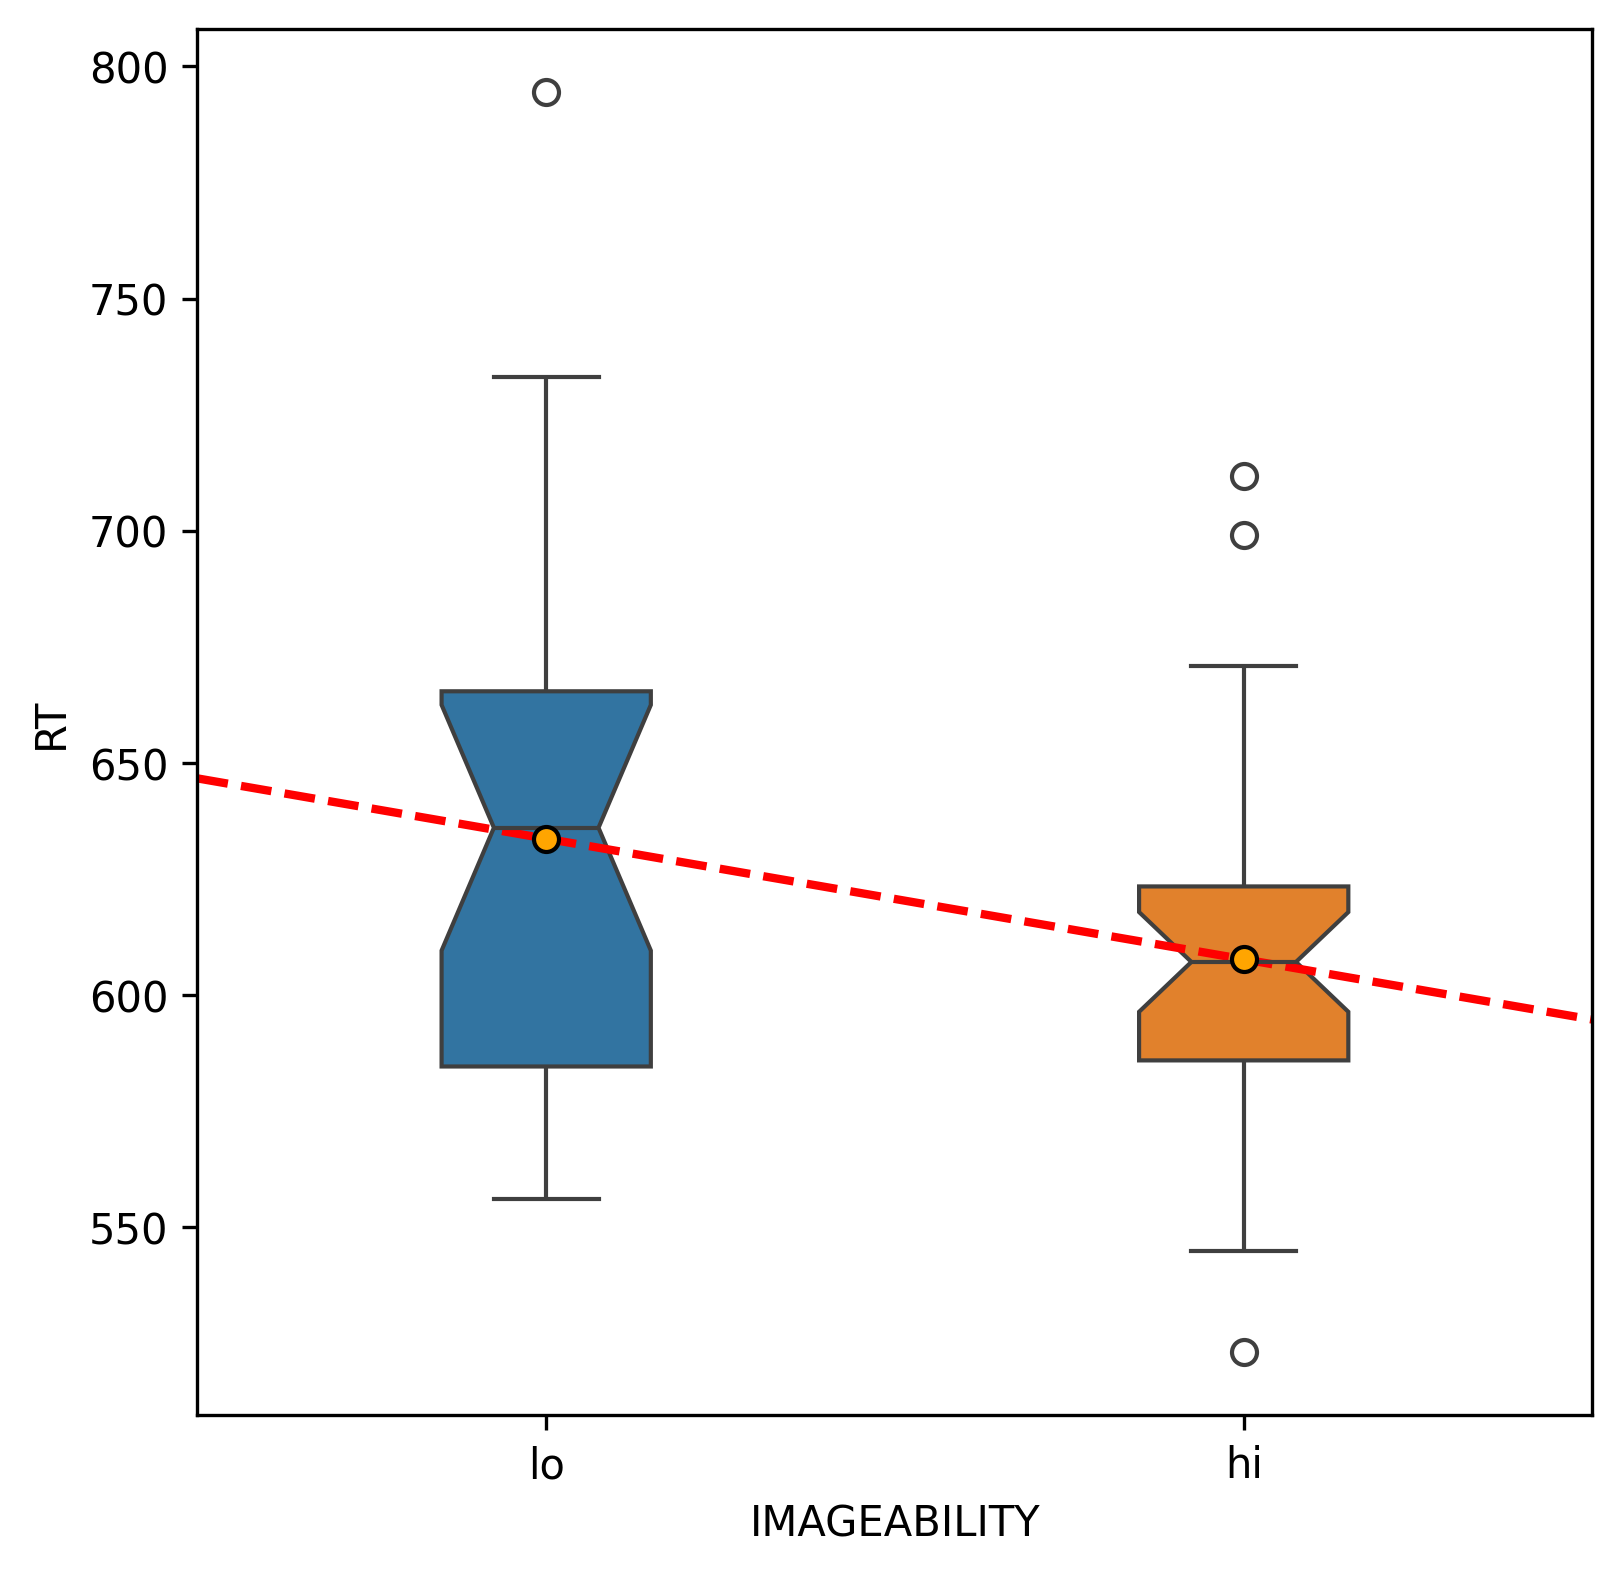

In [14]:
ax = sns.boxplot(
    df,
    y="RT",
    x="IMAGEABILITY",
    hue="IMAGEABILITY",
    notch=True,
    width=0.3,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "orange",
        "markeredgecolor": "black",
        "markersize": "6",
    },
)
# Add the regression line using the model params directly
ax.axline(
    (0, model.params.Intercept),  # reference level, ie 'lo'
    slope=model.params["IMAGEABILITY[T.hi]"],
    color="red",
    linewidth=2,
    linestyle="--",
)
ax.get_legend().remove()
ax.set_xlim(-0.5, 1.5)
plt.show()

This should help you understand that there is indeed a regression line involved, namely the linear line that connects the **means** between both groups (and not the medians,  although they are close for this data).

## Multi-level Categorical predictor

With the two groups of the binary factor IMAGEABILITY, it is still relatively straightforward to get that we could fit a linear model to it (namely the regression line connecting the means of the two groups). Would a similar approach be possible for that other predictor that remains in our data, FAMILIARITY, which is a three-level categorical variable, or a factor with multiple levels? A simple (horizontal) boxplot reveals that there is quite a bit of individual variation across these categories:

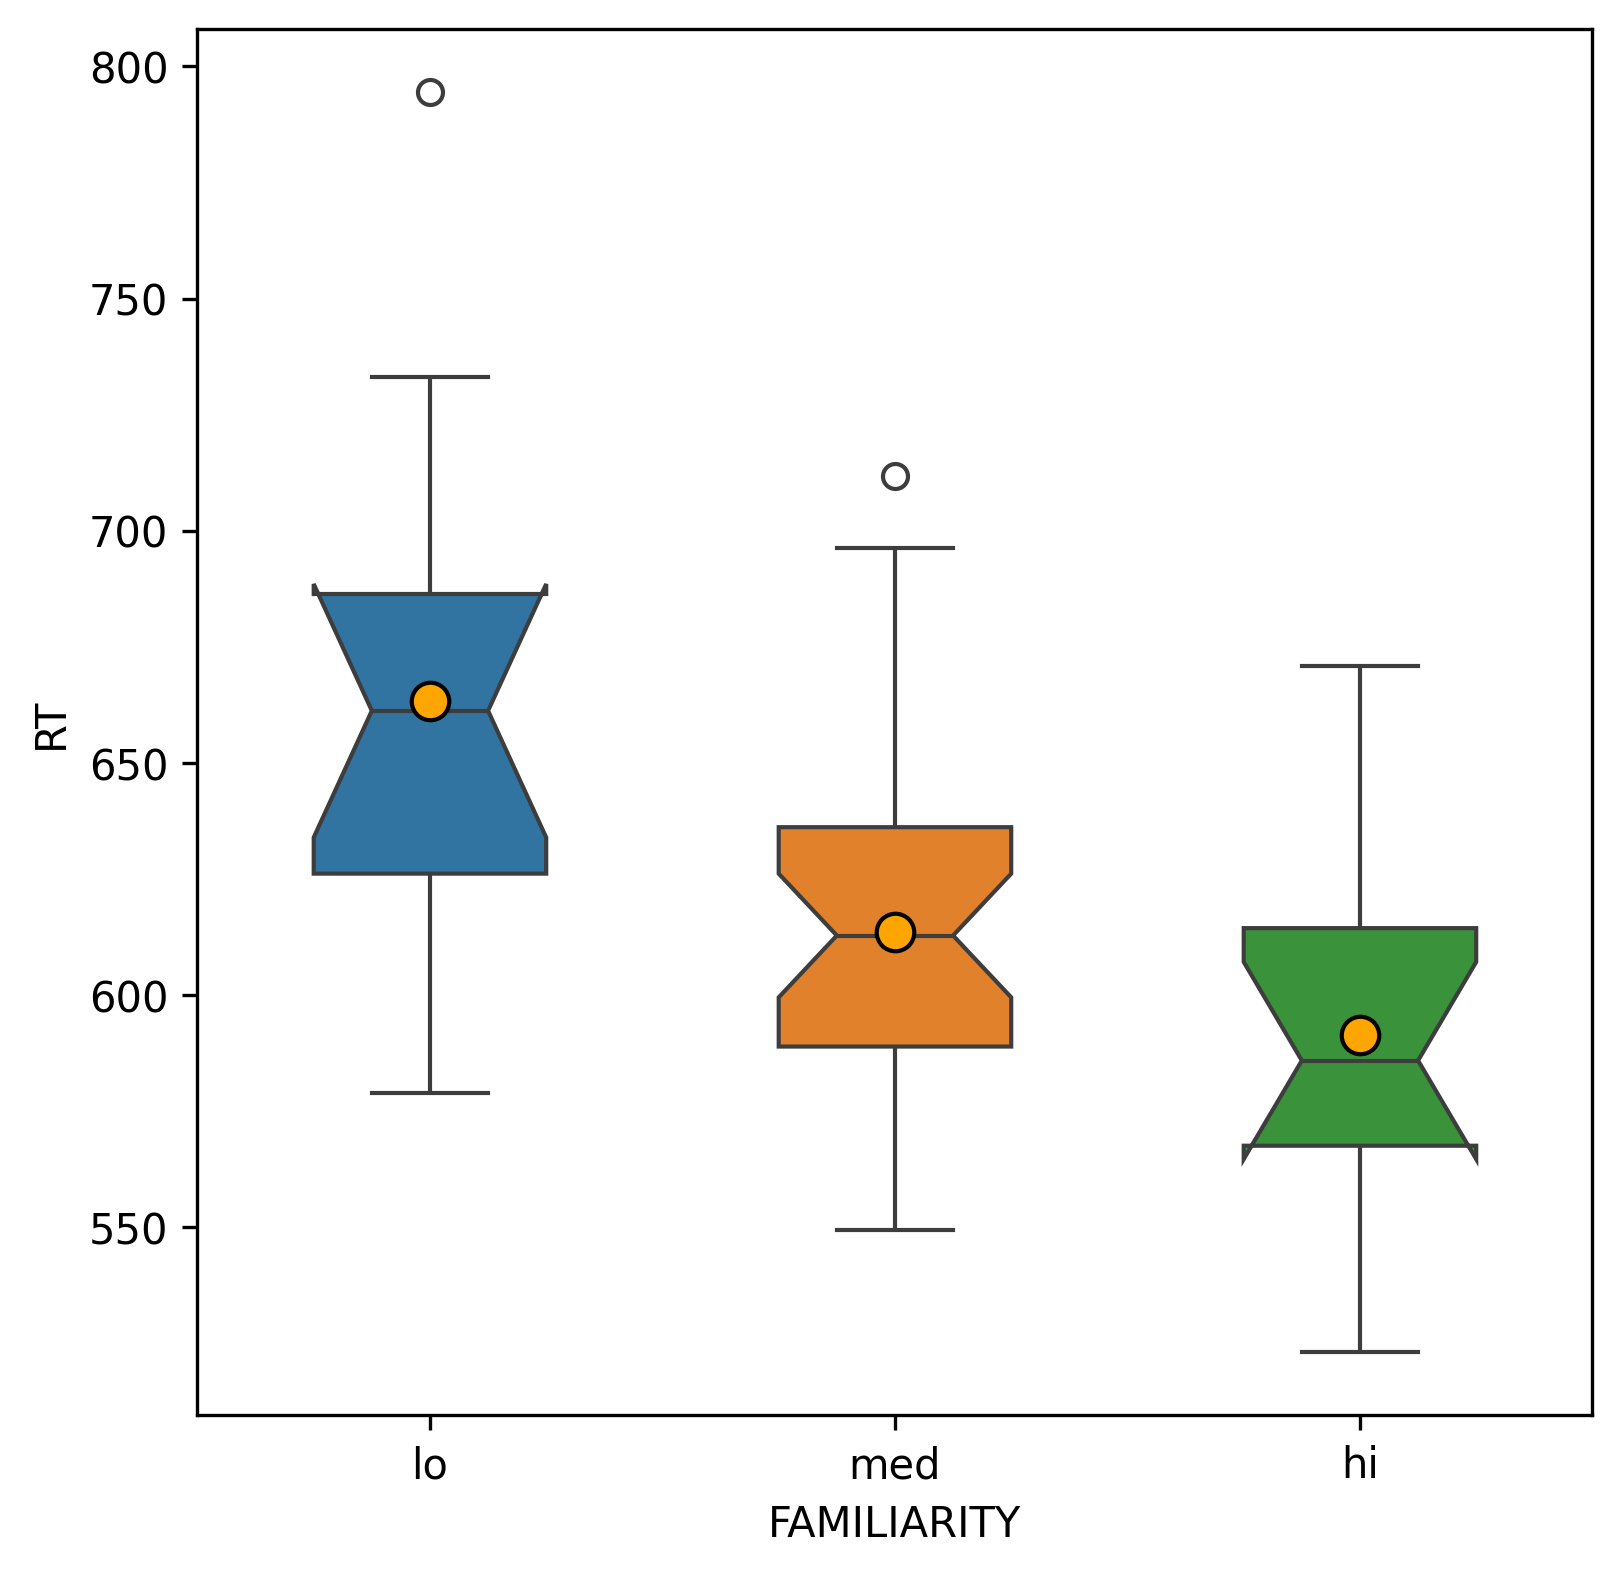

In [15]:
ax = sns.boxplot(
    df,
    y="RT",
    x="FAMILIARITY",
    hue="FAMILIARITY",
    notch=True,
    width=0.5,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "orange",
        "markeredgecolor": "black",
        "markersize": "9",
    },
)
ax.get_legend().remove()
plt.show()

There seems to be a trend (or what we call an **ordinal effect**): as FAMILIARITY goes up, RTs decrease (and that is logical). Therefore, it seems a good idea to try and exploit that predictor in our modelling attempts. As it turns out, `ols()` doesn't complain if we feed it such a multilevel predictor:

In [16]:
model = smf.ols("RT ~ FAMILIARITY", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     7.982
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           0.000948
Time:                        10:12:02   Log-Likelihood:                -286.89
No. Observations:                  55   AIC:                             579.8
Df Residuals:                      52   BIC:                             585.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            663.2880     13

The summary of this model is comparatively verbose. First, let's have a look at the penultimate lines, which are key: the small $p$-value and reasonably high adjusted $R^2$ suggest that FAMILIARITY is useful as a predictor.

But why do we get so many coefficients? And how should we interpret them? This is less straightforward. As the rownames in the coefficients table indicate, we get a separate coefficient for every level in our predictor (`FAMILIARITY[T.med]` and` FAMILIARITY[T.hi]`), except for the reference level (`FAMILIARITY[T.lo]`).

What do the levels mean? For this, we need to go back to the levels of our factor:

In [17]:
df.FAMILIARITY.dtype

CategoricalDtype(categories=['lo', 'med', 'hi'], ordered=True, categories_dtype=object)

As a participants' familiarity with a word is higher, the reaction times get shorter. That explains why we get *negative* coefficients in the "Estimate" column: `FAMILIARITY[T.lo]` is used as the (only) point of reference and doesn't get its own row. 

## Coding Categorial Variables

There is a different way to look at the coefficient effects for categorical variables, and it depends how the data is **coded**. This is tied up, again, with the idea of a *design matrix*, but the formula API for `statsmodels` is hiding most of the details from us (which is generally a good thing).

If you look back at our boxplot, you will see that the notches for `FAMILIARITY.lo` and `FAMILIARITY.med` don't overlap, but the ones for `FAMILIARITY.med` and `FAMILIARITY.hi` overlap quite a lot. Because of this **ordinal effect** we might hypothesize that the effect of the levels is non-linear (RT decreases with medium familiarity, but not much extra afterwards). To do that, we can use a syntax feature of the formula language to specify that we want **backwards difference coding**. 

In [18]:
model = smf.ols("RT ~ C(FAMILIARITY,Diff)", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     RT   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     7.982
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           0.000948
Time:                        10:12:02   Log-Likelihood:                -286.89
No. Observations:                  55   AIC:                             579.8
Df Residuals:                      52   BIC:                             585.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Here, each factor level is reported based on the previous one, so the line for `med` is reported as `[D.lo]` (difference from `lo`). Now the $p$-values seem to support our intuition from the boxplot. The `med` level (shown as `[D.lo]`, i.e. difference from `lo`) is significant at $p=0.002 < 0.05$ (and the 95% CI values are both negative) but the `hi` level's *additional* effect is not significant enough to reject $H_0$, and the 95% ci also calls the effect into question. 

Saying the same thing a different way, the previous `hi` level (without difference coding) showed a significant $p$-value, but that might be only because the effect from the `med` level was already "priced in".

<img src=https://imgs.xkcd.com/comics/extrapolating.png>

<small> Source [XKCD](https://xkcd.com/605/), License CC-BY-NC 2.5 </small>

```
Version History

Current: v1.0.1

6/10/24: 1.0.0: first draft, BN
9/10/24: 1.0.1: proofread, MK
```